In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp


    
-----
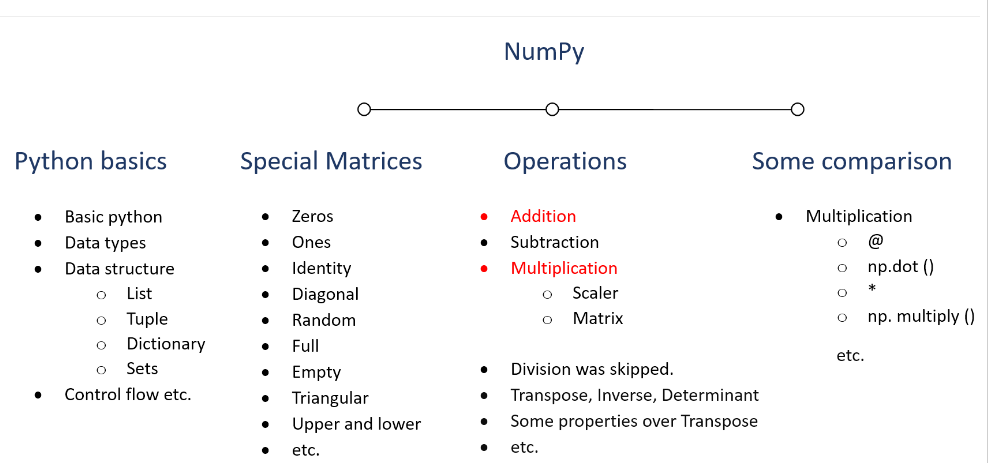



<div style="text-align: left;">
    <h3 style="color: green;">Already Explored </h3> </div>
<div>

-----
    
-----
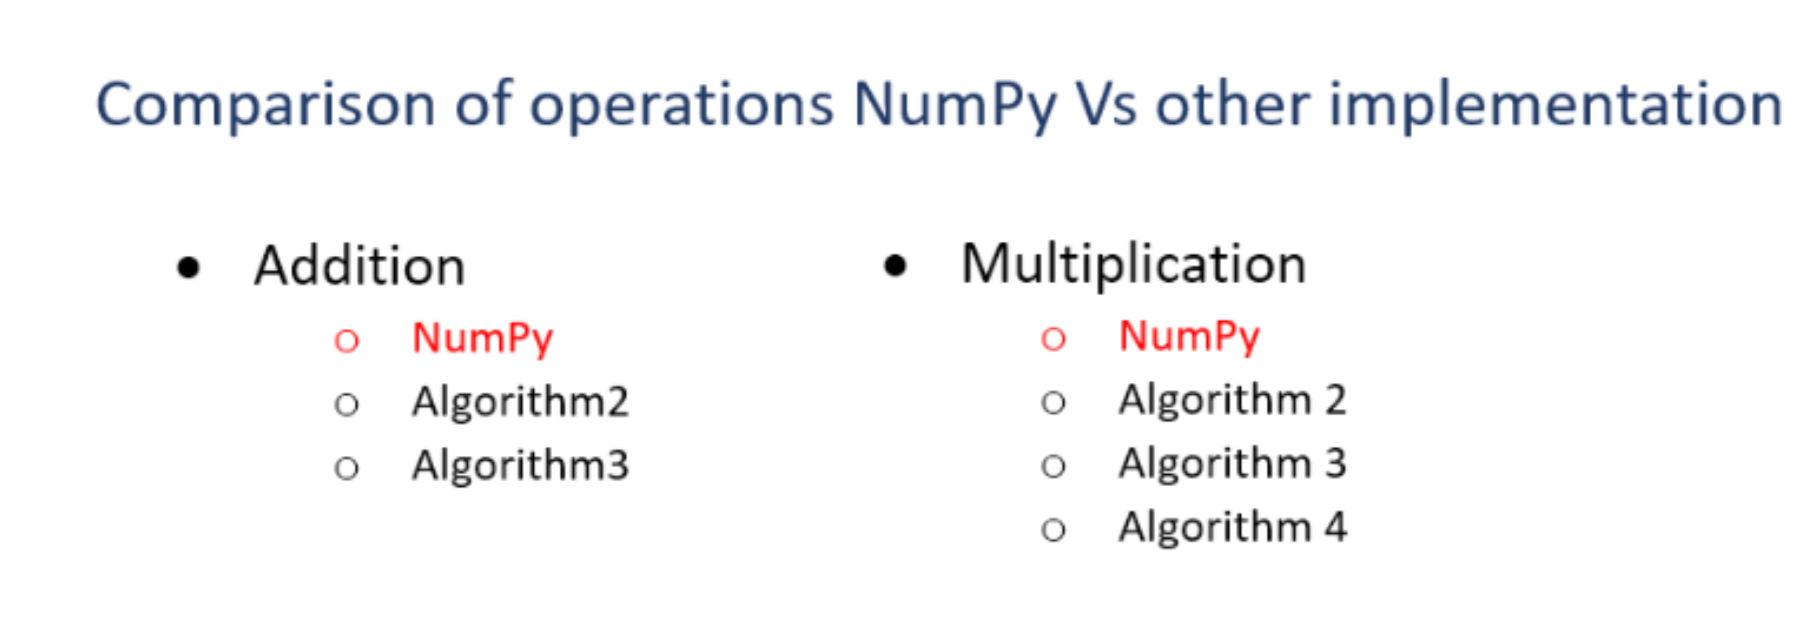



<div style="text-align: left;">
    <h1 style="color: green;">Summary</h1> </div>
<div>

  
----
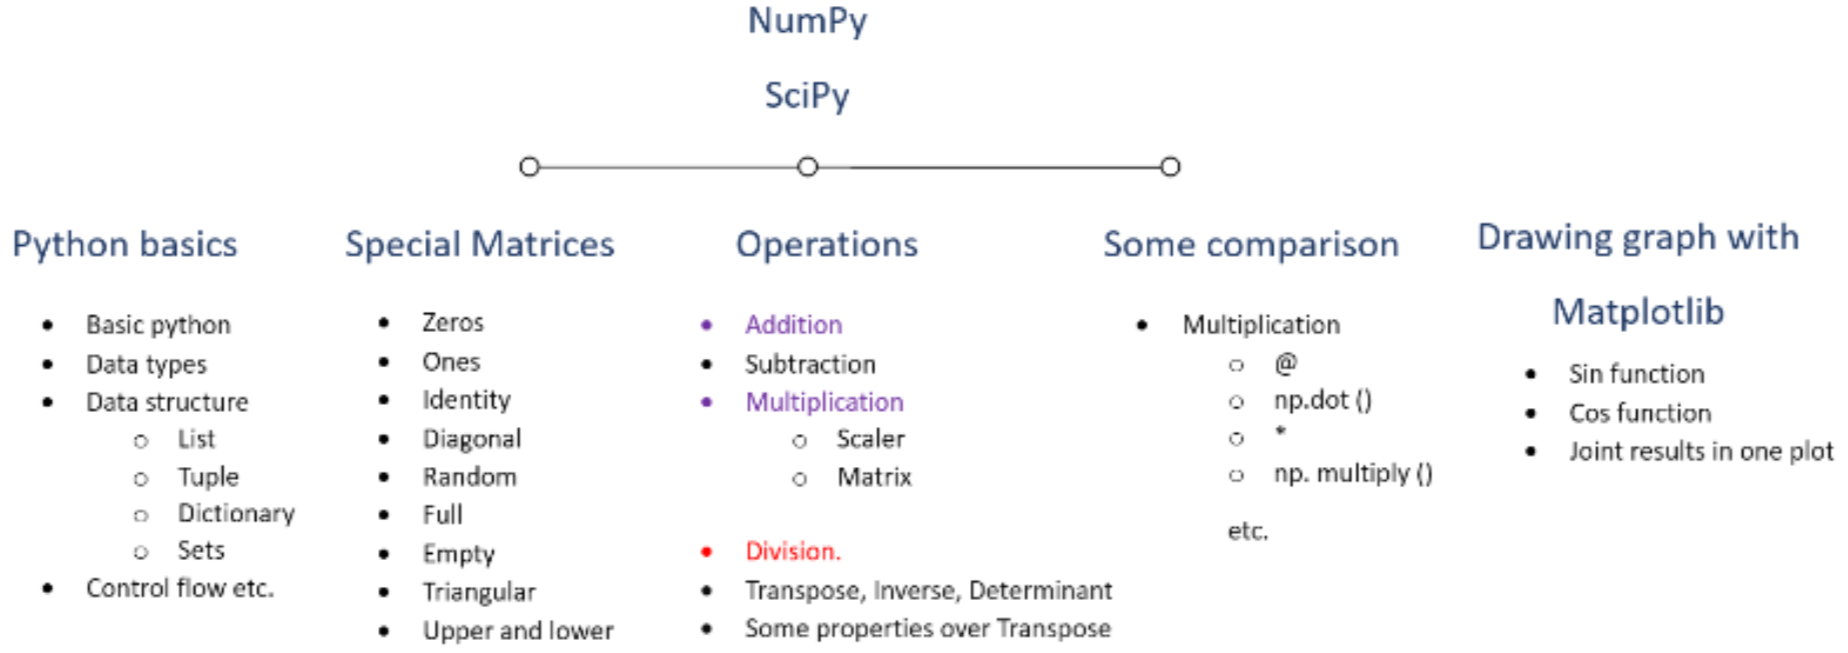


<div style="text-align: left;">
    <h1 style="color: green;">Summary</h1> </div>
<div>

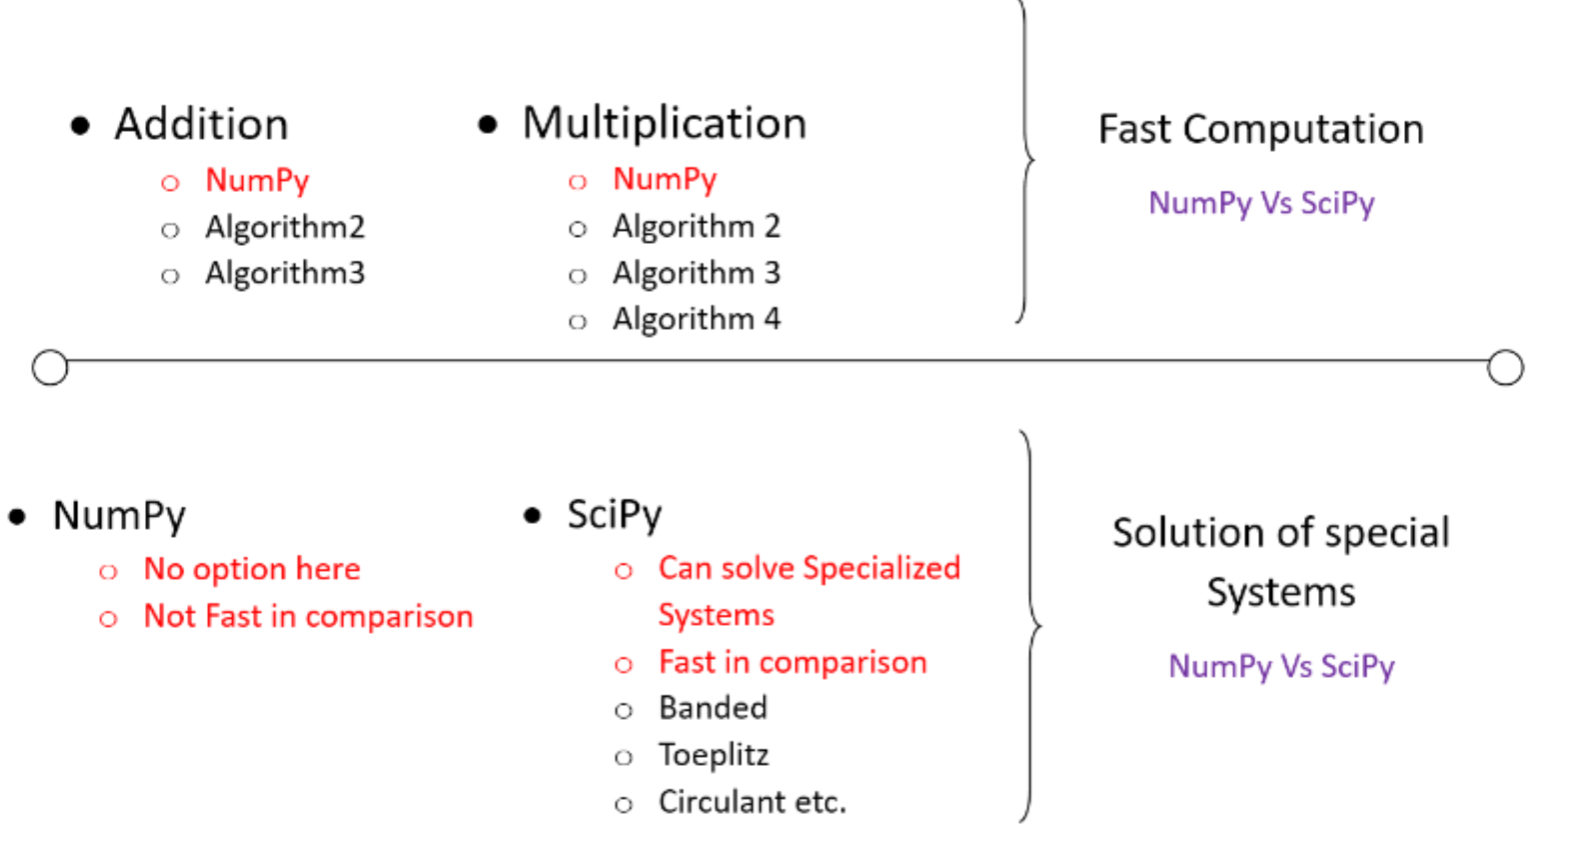


In [6]:
sp.linalg.circulant(np.array([1,2,3]))

array([[1, 3, 2],
       [2, 1, 3],
       [3, 2, 1]])

***Scientific Computing: Numerical Stability and Precision***

## We'll disscuss today
- Introduction to Scientific Computing
- Sources of Error in Numerical Computation
- Floating Point Arithmetic
- Catastrophic Cancellation
- Machine Epsilon
- Addressing Instability in Algorithms
- Conclusion of the chapter

<img src="NC5.png" alt="Vector Image" style="width:100%; height:100%;"/>

## Computer Arithmetic and Sources of Error

Unfortunately computers don't know every single real number. The reason is simple. The real numbers are infinite while the computer memory is finite. This is one of the main reasons of why we can never find the exact solution to a problem by using a computer. We will always find an approximation of it, which sometimes will be good but sometimes it can be bad. 

### Issues with Floating Point Representation
- **Precision Limitations**: Finite number of bits, leading to precision errors
- **Rounding Errors**: Accumulation of small errors in calculations
- **Examples**: Demonstrating issues with \(1.1 + 0.1\)

- As an example of the finite precision arithmetic we can check whether the result of the operation $1.1+0.1$ for a computer is equal to $1.2$ or not

In [7]:
1.1+0.1 

1.2000000000000002

- Unfortunately it is not. So what we always need to have in mind is that when we use floating point arithmetic we almost always have an error in our computations. This is called floating point error.

Specifically:

In [8]:
some_value=0.1
for i in range(2,8):
    
    print((i+some_value)+some_value)

2.2
3.2
4.199999999999999
5.199999999999999
6.199999999999999
7.199999999999999


### **Discretization Error**

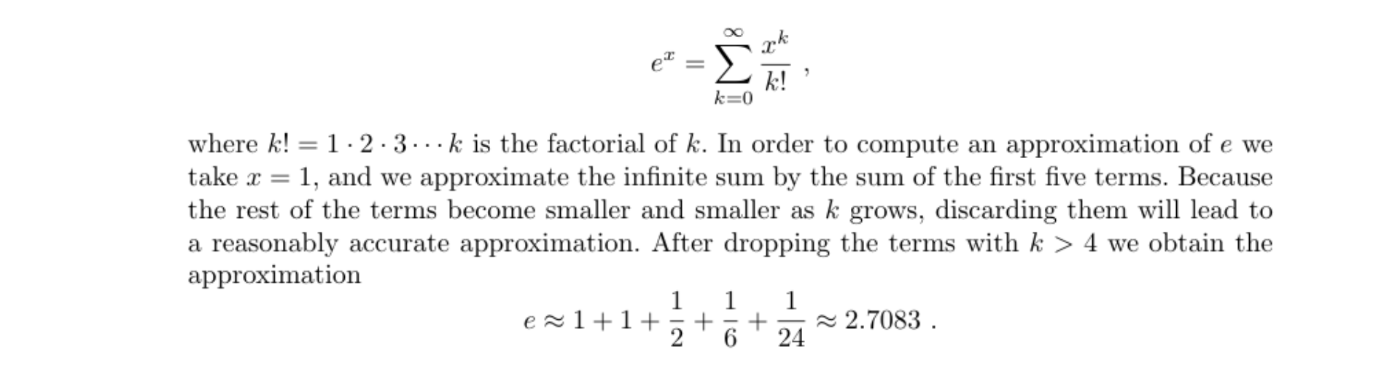

In [10]:
1+1+1/2+1/6

2.6666666666666665

In [12]:
abs((1+1+1/2+1/6)- (1+1+1/2+1/6+1/24))

0.04166666666666652

We continue with another example of floating point error know as catastrophic cancelation:

### Catastrophic cancelation

Consider the function
$$f(x)=\frac{1-\cos(x)}{x^2}.$$
This function is not defined at $x=0$ but using L'Hospital's

$$
    \lim_{x \rightarrow 0} \frac{1 - \cos (x)}{x^2} = \lim_{x \rightarrow 0} \frac{\sin (x)}{2 x} = \lim_{x \rightarrow 0} \frac{\cos (x)}{2} = \frac{1}{2}.
$$

Now let's use computers to estimate the limit.

First we plot the function in the interval $[-5,5]$

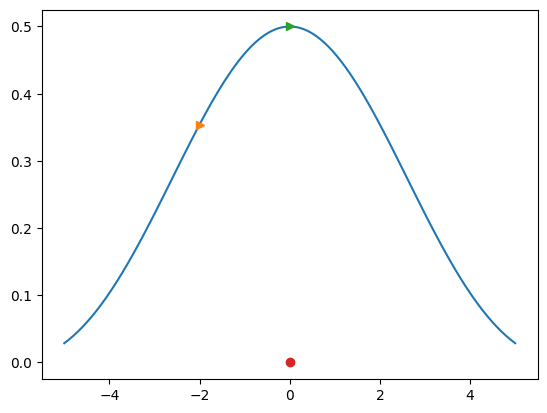

In [17]:
f = lambda x:  (1 - np.cos(x))/x**2
x = np.linspace(-5, 5, 100)
plt.plot(x, f(x), -2,f(-2),'>',-0.00008,f(-0.00008),'>',-0.000000008,f(-0.000000008),'o')


In [21]:
print(f'{1.e-7:.7f}')

0.0000001


In [18]:
f = lambda x:  (1 - np.cos(x))/x**2
x = np.linspace(-5, 5, 100)
y = f(x)
xi = (1.e-5, 1.e-6, 1.e-7, 1.e-8, 1.e-9, 1.e-10, 1.e-11)
for x in xi:
    print('f(',x,')','=',f(x))   

f( 1e-05 ) = 0.5000000413701854
f( 1e-06 ) = 0.5000444502911705
f( 1e-07 ) = 0.4996003610813205
f( 1e-08 ) = 0.0
f( 1e-09 ) = 0.0
f( 1e-10 ) = 0.0
f( 1e-11 ) = 0.0


These results misleadingly indicate that the function $f$ goes to $0$ as $x\rightarrow 0$. 

You cannot get an accurate computation due to catastrofic cancelation (or loss of significance). To understand the problem first keep in mind that computers can only store a finite number of decimal digits. Assume that our machine keeps only 10 floating-point digits (decimal digits) and consider the number:
$$a = 0.12345678901234567890.$$
A floating-point representation of this number on our machine would be:
$$b = 0.1234567890$$

Now perform the calculation:
$$a - b = 0.00000000001234567890$$

However, on the 10-digit floating-point machine, the calculation yields
$$a - b = 0.0000000000$$

This last number can be considered from the machine as 0. So even if we divide this number by something very small it will return zero again. 

### The machine zero (or machine epsilon)

It is true that number 0 is not the only number in a computer that if we add 1 we will get 1
$$0 + 1 = 1$$
There are other numbers that exist due to the finite precision arithmetic. To see this let's do an experiment:

- Take $x = 1$ and add it to $1$.
- Replace $x$ by $x/2$ and add it to $1$ 
- If the result in not $1$ continue dividing by $2$ until the sum $x+1=1$.

In [22]:
x = 1.0
while (1.0 + x != 1.0):
    x = x / 2.0
EPS = 2.0*x
print('EPS = ', EPS)
print('x = ', x)

EPS =  2.220446049250313e-16
x =  1.1102230246251565e-16


So we computed the number `1.1102230246251565e-16` that when we add it to `1` we get `1`. This number behaves like zero and we call it `machine epsilon` 

In [25]:
x

1.1102230246251565e-16

In [26]:
(2*x)+1

1.0000000000000002

Never forget that all numbers that are smaller than `EPS` are considered to be equal to `0` in practical (scaled) problems.

### Floats in Python

The module `numpy.finfo` contains all the extreme values for floating point numbers (double-precision numbers). For example:

In [28]:
from numpy import finfo
print(np.finfo(float))


Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
smallest_normal = 2.2250738585072014e-308   smallest_subnormal = 4.9406564584124654e-324
---------------------------------------------------------------



- From this is clear than there is no `0.0` stored in our machine. The smallest float number is `tiny = 2.2250738585072014e-308`. 
- When we see in our display the number `0.0` or `-0.0` this can be any number between the `-tiny` and the `tiny` numbers. This phenomenon is called *underflow*
- If we compute any number greater than the `max =1.7976931348623157e+308` or less than `min = -1.7976931348623157e+308` we say that we get *overflow* and modern computers represent these numbers by `inf` or `-inf` respectively. Or sometimes we get a `NaN` which means Not a Number.

### Back to our unstable algorithm (a workaround)

In our first example the problem was cause by the difference $1-cos(x)$ in the formula of the function $f(x)$ since $\lim_{x\to 0}\cos(x)=1$. Instead we can improve the formula of the function by using a little bit of trigonometry:
$$
\begin{aligned}
f(x)&=\frac{1-\cos(x)}{x^2}\\
&=\frac{(1-\cos(x))(1+\cos(x))}{x^2(1+\cos(x))}\\
&=\frac{1-\cos^2(x)}{x^2(1+\cos(x))}\\
&=\frac{\sin^2(x)}{x^2(1+\cos(x))}\\
\end{aligned}
$$

***After addressing the issue***

In [29]:
f = lambda x:  np.sin(x)**2/(x**2*(1+np.cos(x)))
x = np.linspace(-5, 5, 100)
y = f(x)
xi = (1.e-5, 1.e-6, 1.e-7, 1.e-8, 1.e-9, 1.e-10,1.e-11)
for x in xi:
    print('f(',x,')','=',f(x)) 

f( 1e-05 ) = 0.4999999999958333
f( 1e-06 ) = 0.4999999999999583
f( 1e-07 ) = 0.4999999999999995
f( 1e-08 ) = 0.5
f( 1e-09 ) = 0.5
f( 1e-10 ) = 0.5
f( 1e-11 ) = 0.5


***Prior it was***

In [201]:
f = lambda x:  (1 - np.cos(x))/x**2
x = np.linspace(-5, 5, 100)
y = f(x)
xi = (1.e-5, 1.e-6, 1.e-7, 1.e-8, 1.e-9, 1.e-10, 1.e-11)
for x in xi:
    print('f(',x,')','=',f(x))   

f( 1e-05 ) = 0.5000000413701854
f( 1e-06 ) = 0.5000444502911705
f( 1e-07 ) = 0.4996003610813205
f( 1e-08 ) = 0.0
f( 1e-09 ) = 0.0
f( 1e-10 ) = 0.0
f( 1e-11 ) = 0.0


### Approximations of $\pi$

Here is an unstable algorithm for the approximation of $\pi$

- Set $y=2.0$
- For $n=1,2,\dots, 30$ 
    - Compute
$$y=2^{n+1}\sqrt{\frac{1}{2}\left(1-\sqrt{1-(2^{-n}y)^2}\right)}$$
- EndFor
- Return $y$ as an approximation of $\pi$

In [120]:
1.0-(2.0**(-29)*yn)**2

1.0

In [116]:

1.0-np.sqrt(1.0-(2.0**(-28)*yn)**2)

np.float64(0.0)

In [30]:
yn = 2.0
for n in range(1,31):
    yn=2.0**(n+1) * np.sqrt(0.5*(1.0-np.sqrt(1.0-(2.0**(-n)*yn)**2)))
    print(n, yn) 

1 2.8284271247461903
2 3.0614674589207187
3 3.121445152258053
4 3.1365484905459406
5 3.140331156954739
6 3.141277250932757
7 3.1415138011441455
8 3.1415729403678827
9 3.141587725279961
10 3.141591421504635
11 3.141592345611077
12 3.1415925765450043
13 3.1415926334632482
14 3.141592654807589
15 3.1415926453212153
16 3.1415926073757197
17 3.1415929109396727
18 3.141594125195191
19 3.1415965537048196
20 3.1415965537048196
21 3.1416742650217575
22 3.1418296818892015
23 3.142451272494134
24 3.142451272494134
25 3.1622776601683795
26 3.1622776601683795
27 3.4641016151377544
28 4.0
29 0.0
30 0.0


The sequence seems to approximate $\pi$ up to $y_{24}$. Then the computation becomes unstable and returns $0$ due to loss of significance. 

To avoid the subtraction of almost equal numbers $a,b\geq 1$ we can use the identity 
$(a-b)(a+b)=a^2-b^2$ with 
$a=1$ and $b=\sqrt{1-(2^{-n}y_n)^2}$ to obtain
$$1-\sqrt{1-(2^{-n}y_n)^2}=\frac{2^{-2n}y_n^2}{1+\sqrt{1-(2^{-n}y_n)^2}}\ .$$
This transforms the recursive sequence to 
$$y_{n+1}=\sqrt{\frac{2}{1+\sqrt{1-(2^{-n}y_n)^2}}} y_n\ ,$$
where again $y_1=2$. Implementing the new recursive iteration we obtain a stable algorithm.

In [31]:
import scipy as sp

In [32]:
sp.linalg.solve_toeplitz()

TypeError: solve_toeplitz() missing 2 required positional arguments: 'c_or_cr' and 'b'

In [33]:
yn = 2.0
for n in range(1,31):
    yn=np.sqrt(2.0/(1.0+np.sqrt(1.0-(2.0**(-n)*yn)**2)))*yn
    print(n, yn) 

1 2.8284271247461903
2 3.0614674589207187
3 3.121445152258053
4 3.1365484905459398
5 3.1403311569547534
6 3.1412772509327733
7 3.1415138011443013
8 3.1415729403670913
9 3.1415877252771596
10 3.1415914215111997
11 3.1415923455701176
12 3.1415925765848725
13 3.141592634338563
14 3.141592648776985
15 3.1415926523865907
16 3.1415926532889924
17 3.141592653514593
18 3.141592653570993
19 3.1415926535850933
20 3.141592653588618
21 3.141592653589499
22 3.1415926535897194
23 3.1415926535897745
24 3.1415926535897882
25 3.141592653589792
26 3.1415926535897927
27 3.1415926535897927
28 3.1415926535897927
29 3.1415926535897927
30 3.1415926535897927


### Approximations based on Intermediate value theorem & Taylor Series

In [34]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

<img src="NC5.png" alt="Vector Image" style="width:100%; height:100%;"/>

### Key Theorems in Numerical Computing

1. **Intermediate Value Theorem (IVT)**
   - A continuous function that changes signs over an interval has a root in that interval.
   - *Purpose:* Confirms the existence of solutions for root-finding.

2. **Mean Value Theorem (MVT)**
   - There is a point where the instantaneous rate of change equals the average rate of change over an interval.
   - *Purpose:* Ensures accuracy in function approximations.
   - *Relation:* Generalizes Rolle's Theorem; applies to intervals where function values are not necessarily equal at endpoints.



3. **Rolle's Theorem**
   - For a function that is continuous on a closed interval, differentiable on the open interval, and has equal values at the endpoints, there is a point where the derivative is zero.
   - *Purpose:* Identifies critical points important for optimization.
   - *Relation:* A special case of the Mean Value Theorem with the additional condition \( f(a) = f(b) \).


### **Intermediate Value Theorem (IVT)**
*Also known as Bolzano's Theorem*

#### **Introduction:**
The Intermediate Value Theorem states that for a continuous function on a closed interval, if the function takes opposite signs at the endpoints, then it must cross zero within that interval.

#### **Importance in Numerical Computing:**
- **Root-Finding:** Guarantees the existence of a root within an interval, essential for solving equations numerically.
- **Interval Analysis:** Helps in identifying where roots exist, forming the basis for various numerical methods.

---

*The Intermediate Value Theorem is crucial for verifying the existence of solutions within intervals, supporting many numerical algorithms.*


<img src="NC5.png" alt="Vector Image" style="width:100%; height:100%;"/>

### **Importance of Intermediate Value Theorem (IVT)**

- **Bisection Method**
- **Fixed-Point Methods**
- **Newton’s Method**
- **Secant Method**

*IVT guarantees the existence of solutions within intervals, which is fundamental for initializing and validating numerical methods.*


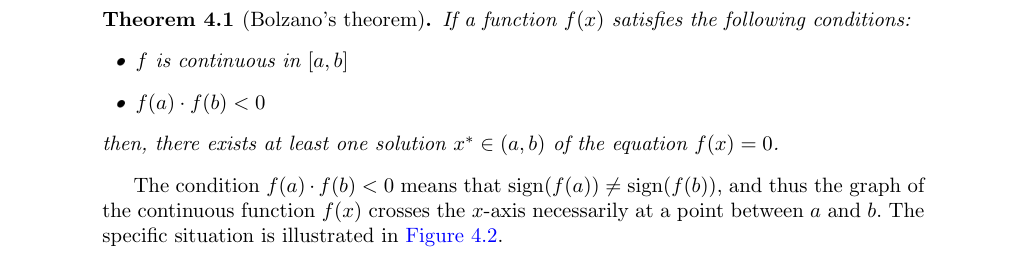

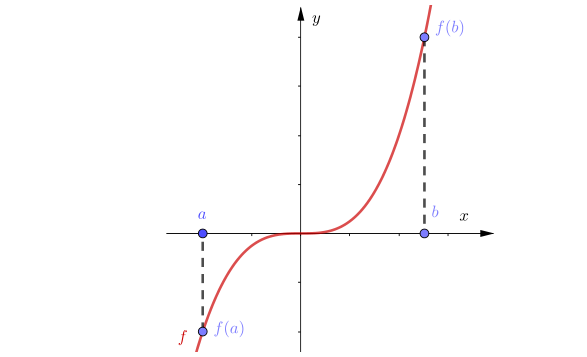

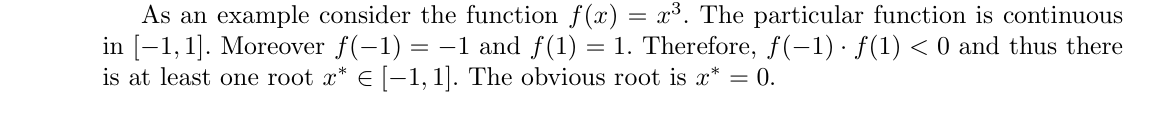

## Example
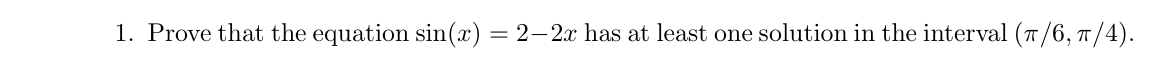

### Solution

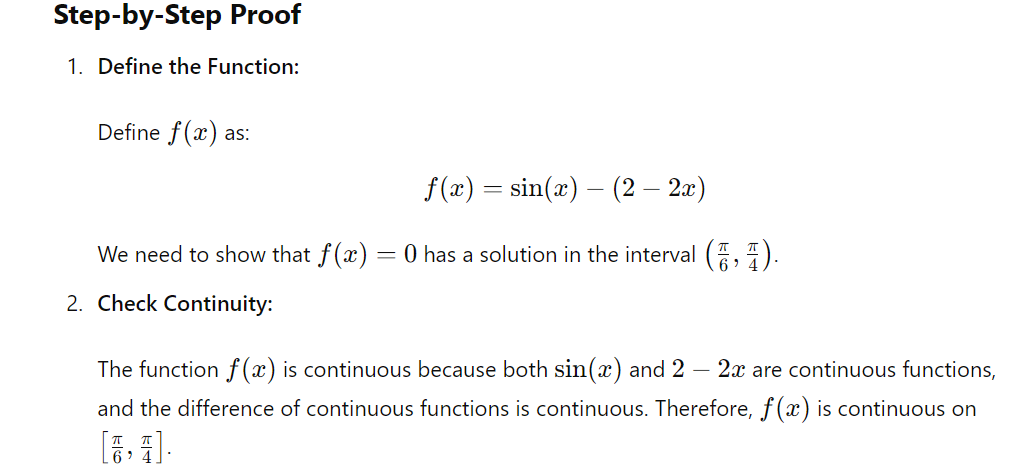

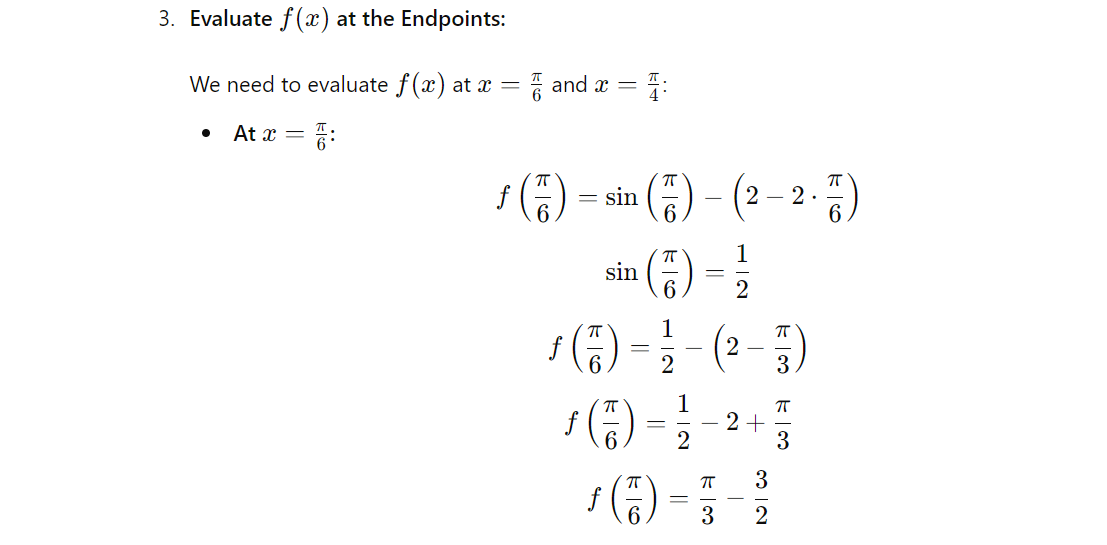

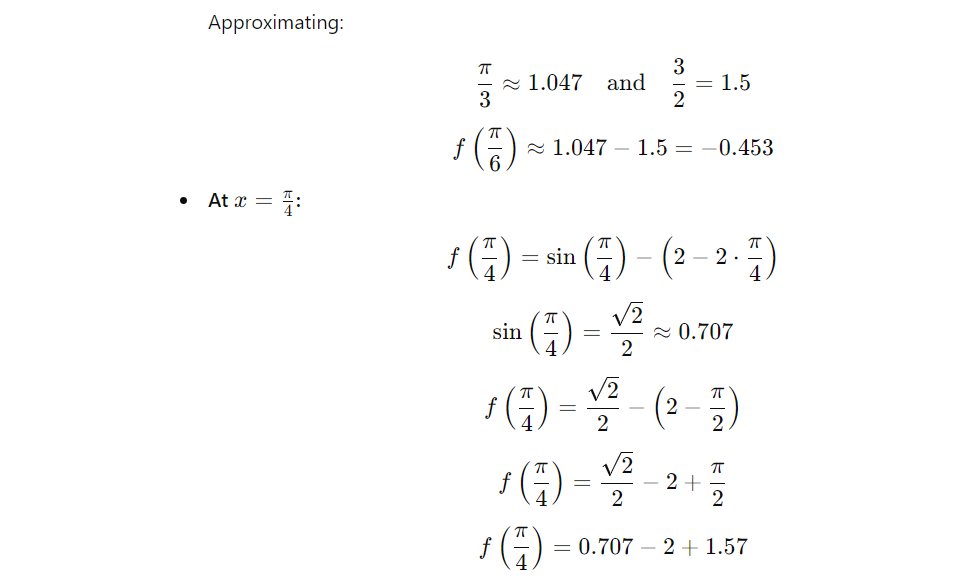

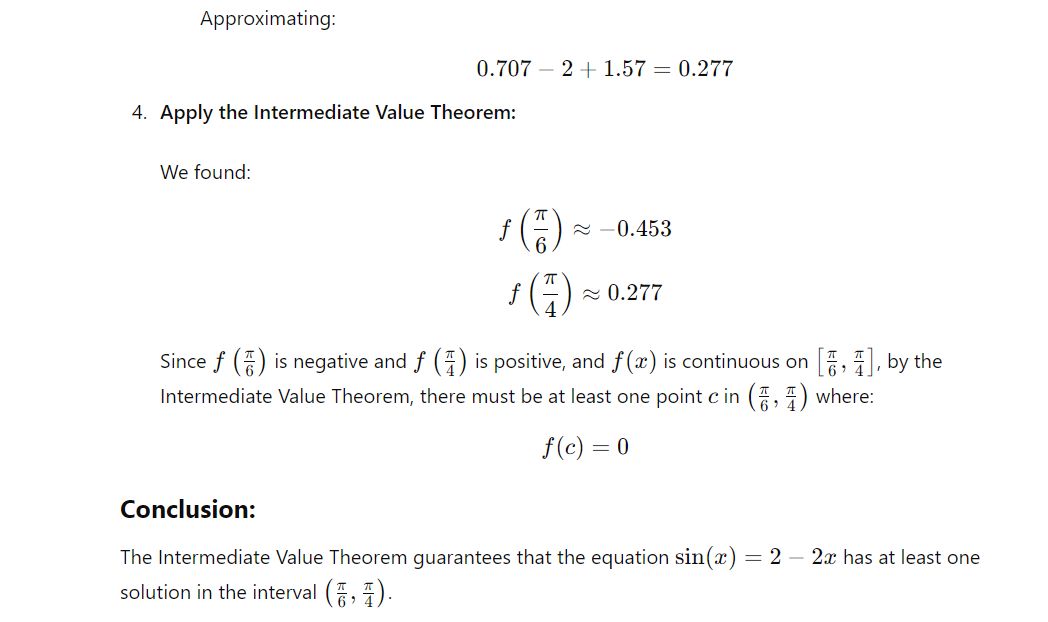

In [19]:
x=np.linspace(-np.pi, 2*np.pi,100)

In [ ]:
plt.plot(x, np.sin(x))
plt.axhline(0)

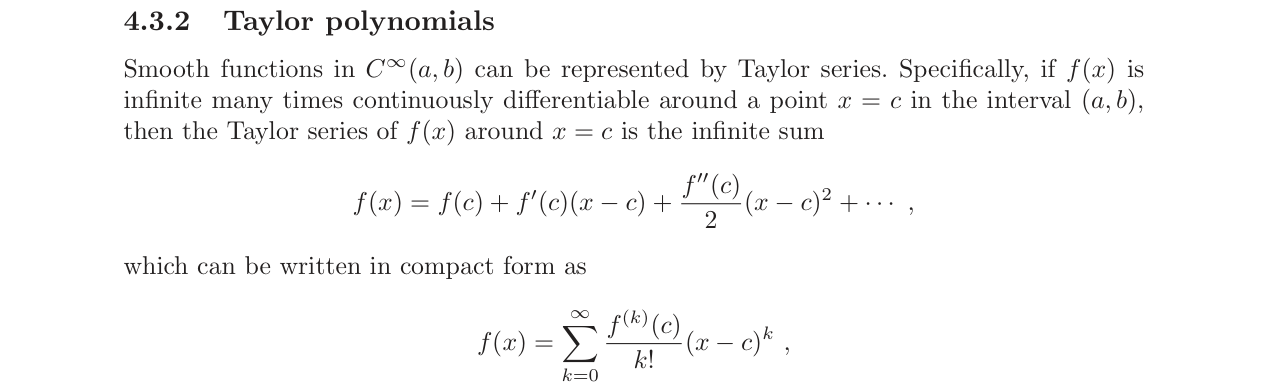

Examples

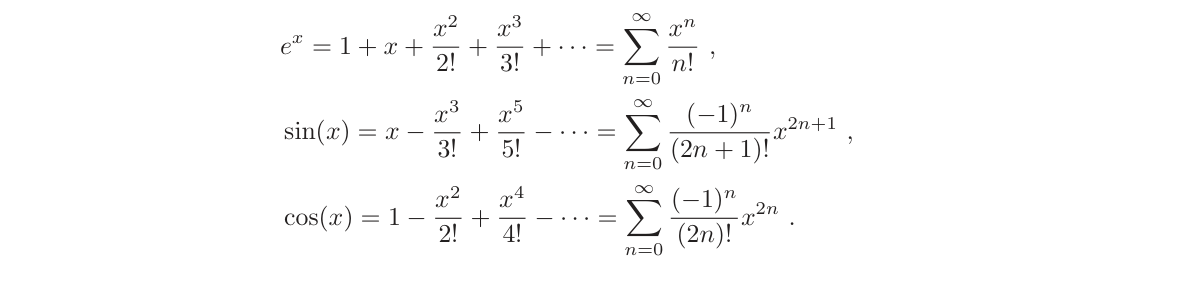

# **If we expand the above**
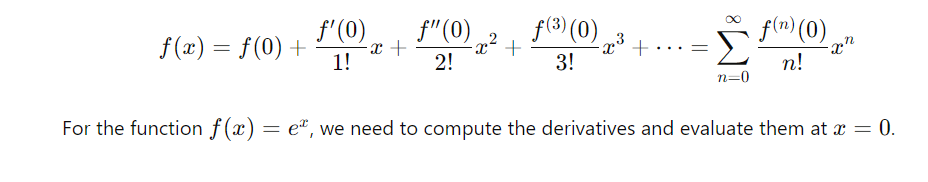

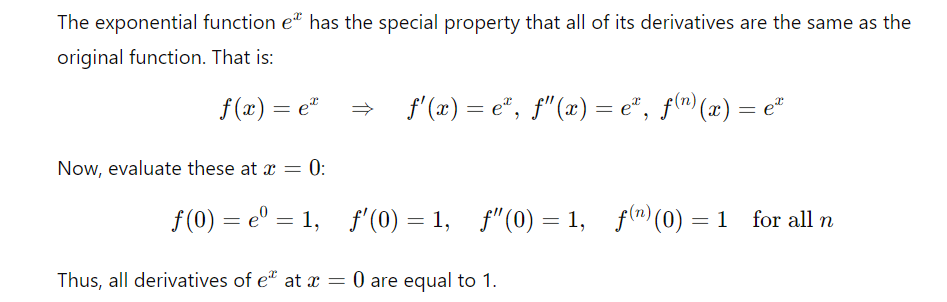

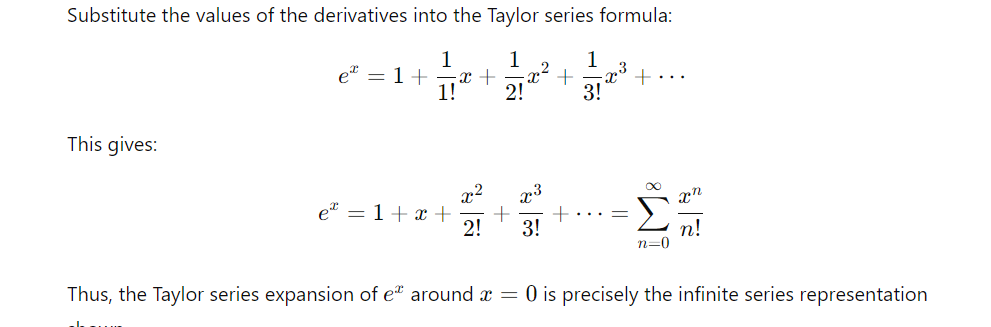

Examples

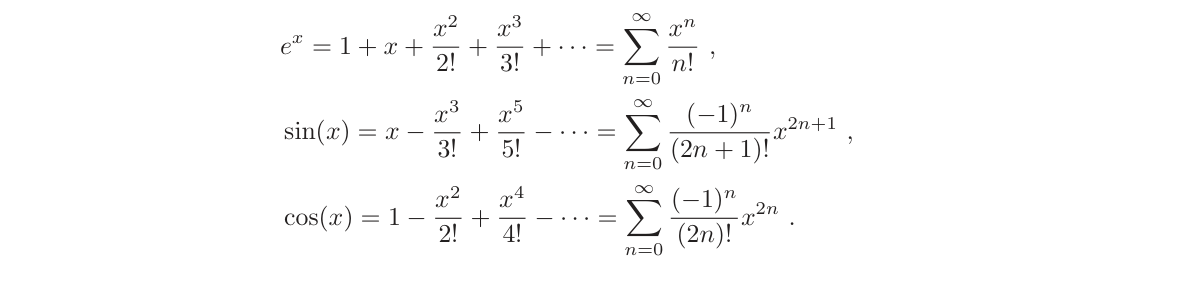